In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 

In [2]:
def f(z,V,k,m,a,α):                                   
    Vt = 0.0;
    R = 1.0;
    c = 1.0;
    ################################################
    # Γt
    G = (1-4*m**2+3*z**2+4*a**2 * m**2 -8*m**2 * z**2 + 3*z**4 - 4*m**2 * z**4 + z**6)
    ###
    Γt_tr = (m*(z+2*z**3+z**5+2*m-a*m*a**2+4*m*z**2+4*m*a**2 * z**2 + 2*m*z**4))/ (z**2 * G)
    Γt_tz = (m*z*(z+2*z**3+z**5+2*m-6*m*a**2+4*m*z**2+2*m*z**4))/(z**2 * G)
    Γt_rt = Γt_tr
    Γt_rϕ = (-m*a*(z+4*m))/(G)
    Γt_ϕr = Γt_rϕ
    Γt_ϕz = (-m*a*z*(3*z+4*m))/(G)
    Γt_zt = Γt_tz
    Γt_zϕ = Γt_ϕz
    ################################################
    # Γr
    H = (z+2*m)*z**2
    ####
    Γr_tt = m/H
    Γr_tϕ = (2*m*a)/H
    Γr_rr = -m/H
    Γr_rz = -m*z/H
    Γr_ϕt = 2*m*a/H
    Γr_ϕϕ = -1*(z**3+m+2*m*z**2)/H
    Γr_zr = (-m*z)/H
    Γr_zz = m/H
#######################
    # Γϕ
    Γϕ_tz = ((a*m*z)*(-4*m+3*z))/(G)
    Γϕ_tr = (a*m*(z-2*z**3+4*m*z**2))/G
    Γϕ_zϕ = (-1*(m*z)*(z+2*z**3+z**5-2*m+6*m*a**2-4*m*z**2-2*m*z**4))/((1+z**2)*G)
    Γϕ_ϕz = -Γϕ_zϕ    
    Γϕ_ϕr = 0; #####################################
#######################
    # Γz
    L = (1+z**2)*(z+2*m)
    Γz_tt = (m*z)/(L)
    Γz_tϕ = (-1*(3*m*a*z)/(L*(1+z**2)))
    Γz_rr = (m*z)/(L)
    Γz_rz = (-m*R)/(L)
    Γz_ϕt = (-3*m*a*z*R**2)/(L*(1+z**2))
    Γz_ϕϕ = (m*z)/(L*(1+z**2))
    Γz_zr = -m/L
    Γz_zz = (-m*z)/((1+z**2)*(np.sqrt(z)+2*m))
#######################################
    Vz,Vϕ,Bϕ = V
    γ = 1./(np.sqrt(1-(Vz**2 + Vϕ**2)))
    print(γ)
#     if np.isnan(γ):
#         γ = 1000
#     γ = 100;
    Uϕ = γ*Vϕ;
    U0 = γ;
    Ur = 0;
    Uz = γ*Vz;  
    gzz = -z/(z+2*m)
    Bz = 1e3
    ###############################
    ## dBϕdz
    L1 = ((z**2/(4*np.pi*(z+2*m)**2))*(((2*(Bϕ*Uz-Bz*Uϕ))) \
                                           + ((z**3 * Bz)/(2*m*a*U0))))+(1./(Vz*U0**2 * (z**-1.5 + k*z**-2.5)))
    
    
    
    L3 = (-2*Vz*Vϕ*Γt_ϕz) + (-1/Vz*U0**2*(z**-.15+k*z**-2.5)) \
    * (Γz_tt+2*Vϕ*Γz_tϕ-2*Γt_tz*Vz**2+Γz_ϕϕ*Vϕ**2 + Vz**2 * (Γz_zz-2*Vϕ*Γt_ϕz) \
    + gzz*(2.5*k*z**-3.5) + (Bϕ/4*np.pi)* (((2*z**2+4*z*m-4*z)/((z+2*m)**3)) \
       + (((z**2)/((z+2*m)**2))*(Γϕ_ϕz+Γr_zr+Γz_zz +Γt_tz)))\
    *(((z*Bϕ)/(z+2*m)) - ((Vz*Bz*z**3)/(2*m*a))))
    
    
#     L4 = ((Bϕ*(2*z**2 + 4*m*z-4*z))/(4*np.pi*(z+2*m)**3))\
#     *2*((((Bϕ*Uz - Bz*Uϕ))/(U0)) + ((Bz*z**3)/(2*m*a*U0**2))) 
    
    L4 = (1./(4*np.pi*U0))*(2*(Bϕ*Uz - Bz*Uϕ) - (z**3 * Bz)/(2*m*a*U0))
    
    
#     L5 = (2*Ur/U0)*(((Bz**2 * Γϕ_tr * z**4)/(4*np.pi * 2*m*a*(z+2*m))) \
#                      + ((z**2 * (Bz**2 + Bϕ**2))/(4*np.pi * (z+2*m)**2))\
#                      *(Γt_tr + Γr_rr + Γϕ_ϕr + Γz_rz))
    
    L5 = ((z**2 * Bϕ)/((z+2*m)**2))*(((2*z**2 + 4*z*m-4*z)/(z**2 * (z+2*m))) \
                                     + (Γϕ_ϕz+Γr_zr+Γz_zz+Γt_tz))
    
    
    
    L2 = Vz*(-1.5*z**(-2.5) - -2.5*k*z**(-3.5)) + (z**-1.5 + k*z**-2.5)*L3 - (L4*L5)
    
    dBϕdz = (L1**-1)*(L2)
######################################################################   
# dVzdz
    M2 = ((z**2)/(4*np.pi * (z+2*m)**2 )) \
    * (((Bϕ*(2*z+4*m-4))/(z*(z+2*m))) + dBϕdz \
       + Bϕ*(Γϕ_ϕz + Γr_zr + Γz_zz + Γt_tz))
    
    M3 = ((Bϕ*z)/(z+2*m)) - ((Vz*z**3 * Bz)/(2*m*a))
    M4 = Γz_tt+Vz**2 * (Γz_zz - 2*Vϕ*Γt_ϕz-2*Γt_tz)\
    +Vϕ*(2*Γz_tϕ+Vϕ*Γz_ϕϕ)
    
    M1 = ((z**-1.5+k*z**-2.5)*U0**2)*(M4) + gzz*(2.5*k*z**-3.5) + M2*M3
    
    dVzdz = ((-1./(Vz*U0**2*(z**-1.5+k*z**-2.5)))**-1)*(M1)
   ##################################################################3 
    # dVϕdz
    N2 = (2*(z**-1.5 + k*z**-2.5)*U0**2 * Vz)\
    *(Γϕ_tz - Vϕ * Γt_tz - Vϕ**2 * Γt_zϕ )
    
    N3 = ((z**2)/((z+2*m)**2 ))*(((Bϕ*(2*z+4*m-4))/(z*(z+2*m))) + dBϕdz \
       + Bϕ*(Γϕ_ϕz + Γr_zr + Γz_zz + Γt_tz))
    
    N4 = (Bz/4*np.pi)*(((Vϕ*z**3)/(2*m*a)) + (z/(z+2*m)))
    N5 = z/(z+2*m) - (z**3/(2*m*a)) + Uϕ*(Uϕ+Uz)
    N6 = (α*k*z**-2.5)*(2*Γϕ_ϕr + Γr_zr)
    N1 = N2 - N3*N4 + N5*N6
    dVϕdz = (((z**-1.5 * k*z**-2.5)*Vz*U0**2)**-1)*(N1)
    
    dVdz = [dVzdz, dVϕdz,Bϕ]
    return dVdz

In [22]:
# f(r,V,k,m,a,c,α)
V = solve_ivp(fun=f, t_span=[4.1,60.2], y0=[0.70,0.6,4.7e4],
             method='Radau', args=(0.364,1,0.9,1), dense_output=False)  
# Radau
# RK4

2.58198889747161
2.4816749775428946
2.5819887717878203
2.5819888051324966
2.58198889747161
2.58198889747161
2.58198889747161
2.58198889747161
nan
42.01495853394306
nan
2.58198889747161
2.58198889747161
2.58198889747161
nan
nan
nan
2.58198889747161
2.58198889747161
2.58198889747161
2.1610504397825596
1.509249294618291
1.458740507487584
2.58198889747161
2.58198889747161
2.58198889747161
2.3842279982637002
1.9042476199081868
1.6565501585420144
2.395658418811945
1.9266683679869034
1.7302385447436115
2.58198889747161
2.58198889747161
2.58198889747161
2.4810094518889194
2.2003542069681843
2.0278959442592477
2.041057969715136
1.9561441376647712
1.7444274636258934
1.634005838112815
1.9558642890170206
1.7435964084185602
1.6368382317402983
1.9556786220283948
1.7438966991413218
1.636854488290554
1.6367943600873982
1.6367943280697772
1.6367943511516447
1.6367943600873982
1.6335974481274889
1.6236972147142383
1.616751543853974
1.6335867520894418
1.6236973196234987
1.616758468839209
1.61675846826231

/tmp/ipykernel_6612/3683638625.py:49: RuntimeWarning: invalid value encountered in sqrt
  γ = 1./(np.sqrt(1-(Vz**2 + Vϕ**2)))


1.0537578256104025
1.0537578209639662
1.0537578171388662
1.0537578247112154
1.0537578274467627
1.0537578517262562
1.0537578868474098
1.0537578216544843
1.053757793626472
1.0537577371993314
1.0537578247112411
1.0537578247112136
1.0537578247112154
1.0537578274467627
1.0537578517262562
1.0537578868474098
1.0537578230641862
1.0537578212534962
1.0537578219316557
1.053757819740624
1.0537578194280237
1.0537578168764608
1.0537578121733127
1.0537578194415087
1.0537578186196128
1.0537578179940061
1.0537578181571856
1.0537578148910813
1.053757738685476
1.0537575466146931
1.0537578160910739
1.0537578063607393
1.0537577927593929
1.053757804442623
1.0537577741818112
1.0537574507349996
1.053756803541849
1.0537577853428348
1.0537577061243528
1.0537576444947512
1.0537576724627487
1.0537576001743008
1.0537575153576146
1.0537577154804147
1.0537575981542813
1.0537573607310267
1.053757201137576
1.0537571801725292
1.0537569721058881
1.0537564343577064
1.0537562515968006
1.053756960952643
1.053756260623699
1

1.0537008966860029
1.0537011179257798
1.0537020434234048
1.0537030071133617
1.0537011197034039
1.053702060220661
1.0537030994514396
1.0537031055806116
1.0537037081507497
1.053706491470801
1.0537097424652342
1.053703724058664
1.0537066593357176
1.053710663063121
1.0537037345028524
1.053706665304939
1.0537108372894668
1.053703738079838
1.0537066631350906
1.0537108613163562
1.0537032978591463
1.0537039860743633
1.0537045727088228
1.053703298312424
1.0537039935894223
1.0537045970273278
1.053704598066095
1.0537051117116045
1.0537072215275816
1.0537093722869164
1.0537051149957868
1.0537072526015314
1.0537095429157262
1.0537051161144484
1.0537072535500438
1.0537095600562492
1.0537095613940444
1.0537095613940701
1.0537095613940477
1.0537095613940444
1.0537098651737336
1.053710909906532
1.053711755758832
1.0537098654987298
1.0537109161959746
1.0537117752038365
1.0537117752935223
1.0537127995094224
1.0537169545094405
1.0537211326701077
1.0537128060650989
1.0537169995334585
1.053721409254379
1.05

In [19]:
P1 = V

In [21]:
P2 = V

In [23]:
P3 = V

In [24]:
P3.y.shape

(3, 263)

In [25]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim

245

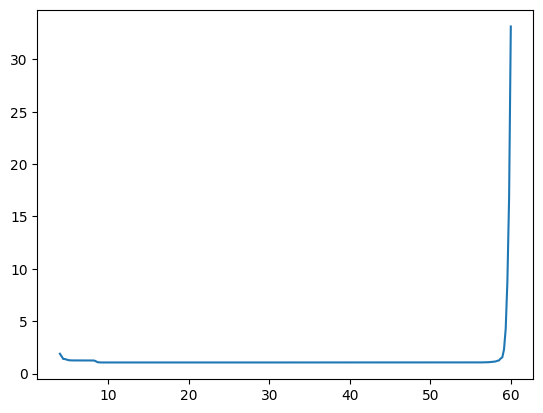

In [26]:

ga = 1./np.sqrt(1-(P1.y[0,:]**2 + P1.y[1,:]**2))
t = np.linspace(4,60,P1.y.shape[1])
plt.plot(t,ga)
plt.show()

In [17]:
np.all(ga == 0)

False

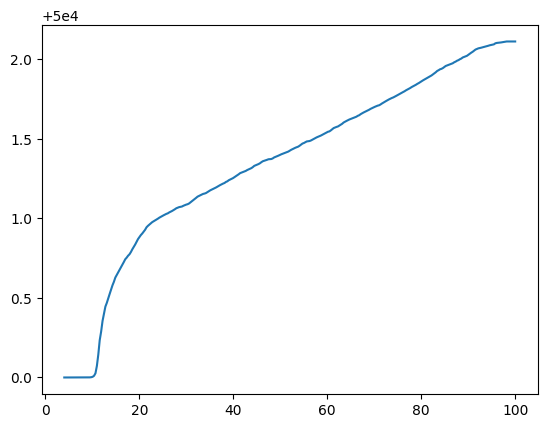

In [21]:
t = np.linspace(4,100,P2.y.shape[1])
plt.plot(t,P2.y[2,:])
plt.show()
# plt.plot(t,P1.y[0,0:dim],'b',label="Vr=-0.2")

In [15]:
np.all(P1.y[1,:]<0.1)

False

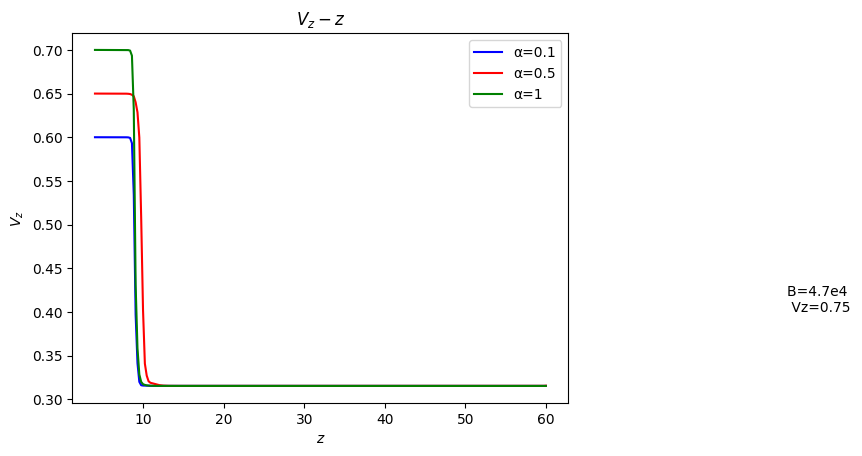

In [27]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
# dim = 50
# t = np.linspace(4,100,50)
t = np.linspace(4,60,dim)
plt.plot(t,P1.y[0,0:dim],'b',label="α=0.1")
plt.plot(t,P2.y[0,0:dim],'r',label="α=0.5")
plt.plot(t,P3.y[0,0:dim],'g',label="α=1")
plt.legend()
plt.xlabel(r"$z$")
# plt.xlim(0,70)
# plt.xticks(np.arange(0,71,5))
# plt.ylabel(r"$V_r$")
# plt.ylabel(r"$V_ϕ$")
plt.ylabel(r"$V_z$")
plt.text(90,0.4,"B=4.7e4 \n Vz=0.75")
# plt.title(r"$V_r - r$")
# plt.title(r"$V_ϕ - r$")
plt.title(r"$V_z - z $")
plt.show()
# plt.savefig("Vz")

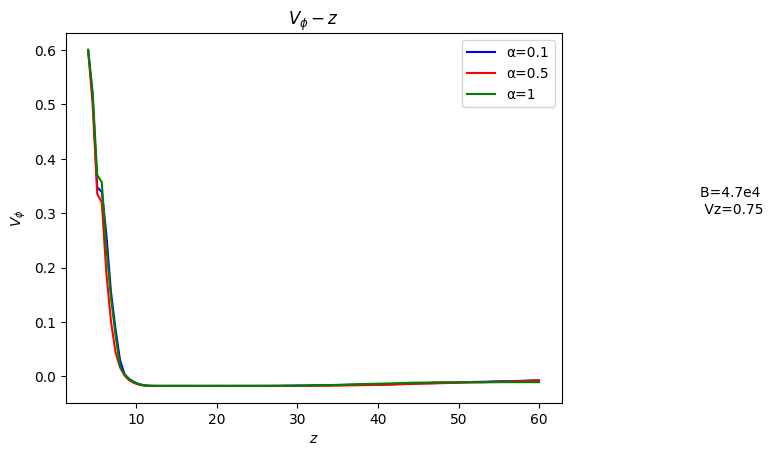

In [31]:
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim = 100
# t = np.linspace(4,100,50)
t = np.linspace(4,60,dim)
plt.plot(t,P1.y[1,0:dim],'b',label="α=0.1")
plt.plot(t,P2.y[1,0:dim],'r',label="α=0.5")
plt.plot(t,P3.y[1,0:dim],'g',label="α=1")
plt.legend()
plt.xlabel(r"$z$")
# plt.xlim(0,70)
# plt.xticks(np.arange(0,71,5))
plt.ylabel(r"$V_ϕ$")
# plt.ylim(0,0.45)
# plt.yticks(np.arange(0,0.46,0.05))
plt.text(80,0.3,"B=4.7e4 \n Vz=0.75")
plt.title(r"$V_ϕ - z$")
plt.show()
# plt.savefig("Vϕ")

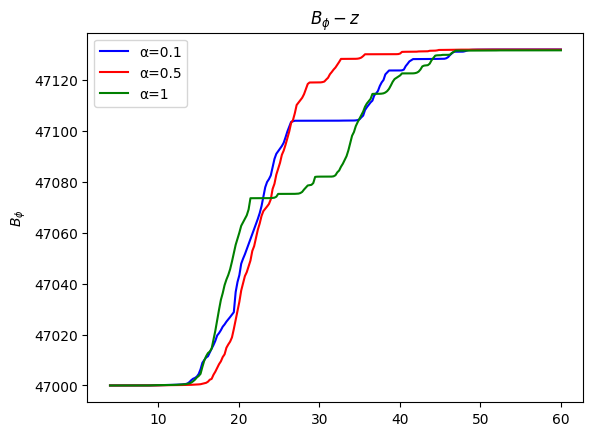

In [32]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
# dim = 50
# t = np.linspace(4,100,50)
t = np.linspace(4,60,dim)
plt.plot(t,P1.y[2,0:dim],'b',label="α=0.1")
plt.plot(t,P2.y[2,0:dim],'r',label="α=0.5")
plt.plot(t,P3.y[2,0:dim],'g',label="α=1")
plt.legend()
# plt.xlabel(r"$z$")
# plt.xlim(0,70)
# plt.xticks(np.arange(0,71,5))
plt.ylabel(r"$B_ϕ$")
# plt.ylim(0,0.45)
# plt.yticks(np.arange(0,0.46,0.05))
plt.title(r"$B_ϕ - z$")
# plt.text(90,50e3,"B=4.7e4 \n Vz=0.75")
plt.show()
# plt.savefig("Bϕ")

In [20]:
np.any(P1.y[1,:]<0)

True

In [21]:
P1.y[1,:]

array([ 0.45      ,  0.6327878 ,  0.71507533, ..., -0.00189005,
       -0.00189008, -0.00189078])